In [1]:
#colors = {'Adelie': 'red', 'Gentoo': 'blue', 'Chinstrap': 'green'}
#df['color'] = df.species.map(colors)

In [1]:
import pandas as pd
df = pd.read_csv('/Users/cemakay/DataScience/Jupyter/Data/penguins.csv')
df.shape

(344, 7)

In [2]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [3]:
df[df.isnull().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [4]:
#df = df.dropna(axis=0).reset_index(drop=True)

In [5]:
df.groupby('species').agg({'body_mass_g':['mean', 'std', 'min', 'max']})

body_mass_g                            
                  mean         std     min     max
species                                           
Adelie     3700.662252  458.566126  2850.0  4775.0
Chinstrap  3733.088235  384.335081  2700.0  4800.0
Gentoo     5076.016260  504.116237  3950.0  6300.0

In [6]:
#returns all including NaN values
df.groupby('island').size()

island
Biscoe       168
Dream        124
Torgersen     52
dtype: int64

In [7]:
#counts unique values and sorts in descending order
df.value_counts('island')

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [11]:
df.groupby(by=['species', 'island']).agg({'body_mass_g': 'max'})

body_mass_g
species   island                
Adelie    Biscoe          4775.0
          Dream           4650.0
          Torgersen       4700.0
Chinstrap Dream           4800.0
Gentoo    Biscoe          6300.0

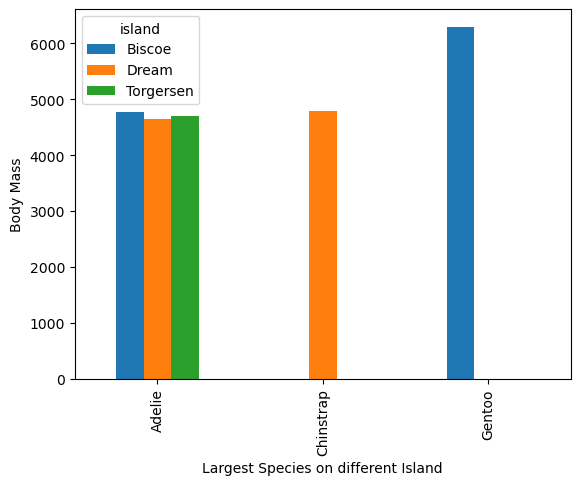

In [12]:
largest = df.groupby(by=['species', 'island']).agg({'body_mass_g': 'max'}).unstack('island')
largest.columns = largest.columns.get_level_values(1)  # Flatten the column index
largest.plot(kind='bar', ylabel='Body Mass', xlabel='Largest Species on different Island', legend=True);
